# 先对train处理

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "playground-series-s5e3/train.csv"
df = pd.read_csv(file_path)
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


整个数据其实很好，都是数值类型，然后也没有缺失值

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [4]:
df = df.drop(columns=['id', 'day'])

In [5]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


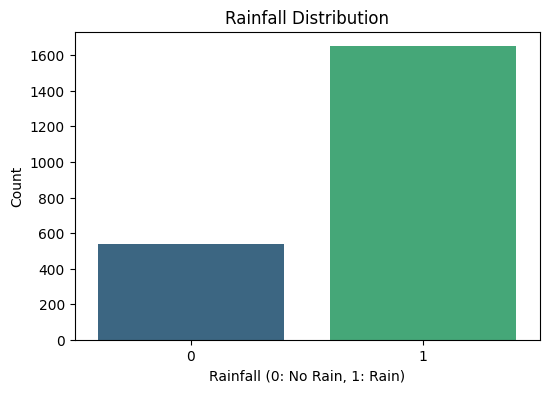

📌 Rainfall 类别比例：
rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['rainfall'], palette="viridis")
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (0: No Rain, 1: Rain)")
plt.ylabel("Count")
plt.show()

# 计算类别比例
rainfall_counts = df['rainfall'].value_counts(normalize=True)
print("📌 Rainfall 类别比例：")
print(rainfall_counts)

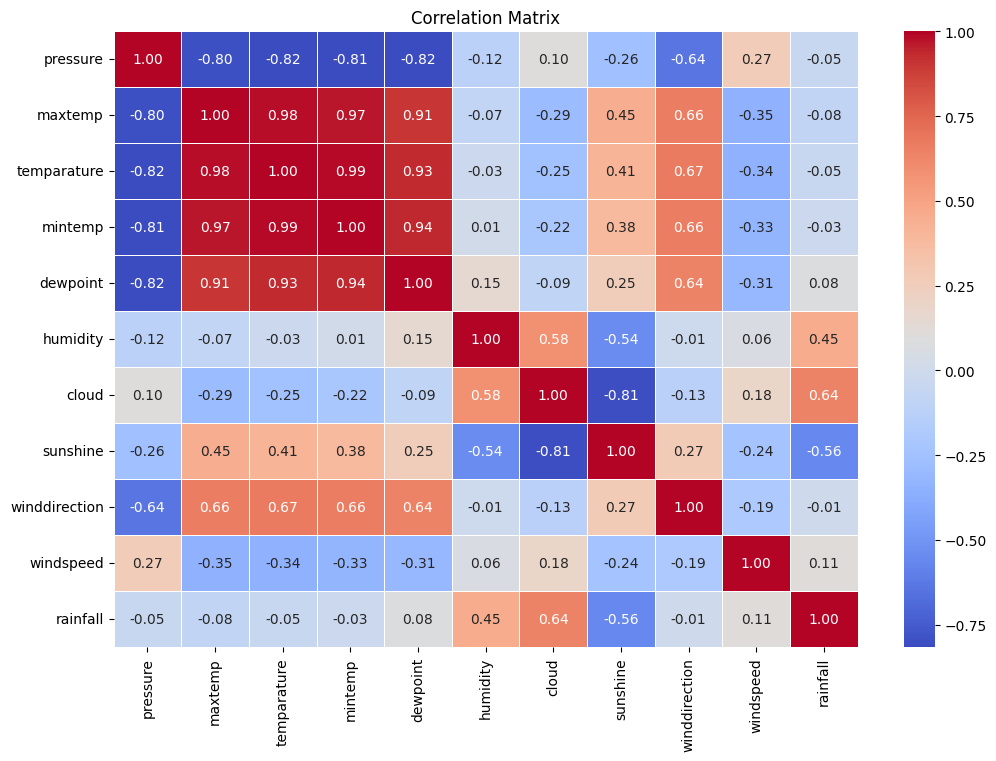


📌 与 `rainfall` 相关性最高的特征：
cloud            0.641191
humidity         0.454213
windspeed        0.111625
dewpoint         0.081965
winddirection   -0.006939
mintemp         -0.026841
temparature     -0.049660
pressure        -0.049886
maxtemp         -0.079304
sunshine        -0.555287
Name: rainfall, dtype: float64


In [7]:
# 计算相关性矩阵
correlation_matrix = df.corr()

# 绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# 查看与 `rainfall` 的相关性（按相关性排序）
rainfall_corr = correlation_matrix["rainfall"].drop("rainfall").sort_values(ascending=False)
print("\n📌 与 `rainfall` 相关性最高的特征：")
print(rainfall_corr)

In [8]:
df = df.drop(columns=["winddirection"])

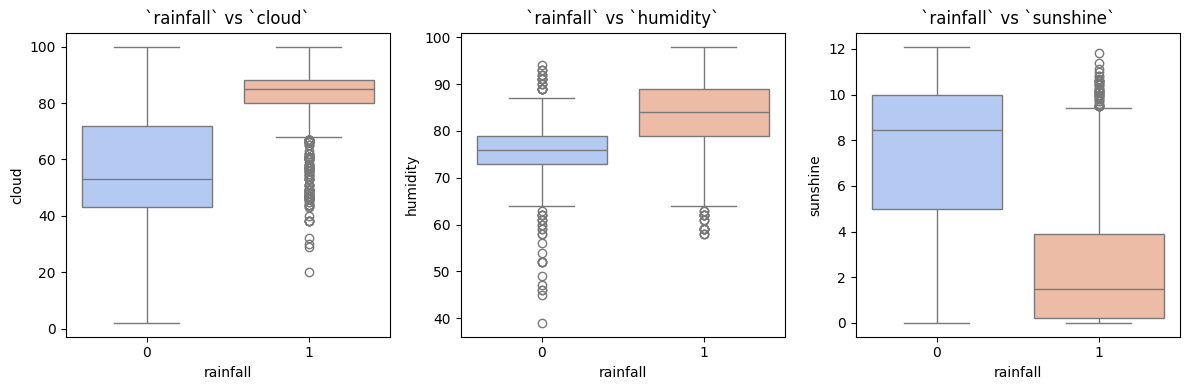

In [9]:
# 选取相关性最高的特征
important_features = ["cloud", "humidity", "sunshine"]

plt.figure(figsize=(12, 4))

for i, feature in enumerate(important_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df["rainfall"], y=df[feature], palette="coolwarm")
    plt.title(f"`rainfall` vs `{feature}`")
    
plt.tight_layout()
plt.show()

In [10]:
import numpy as np

# 计算 IQR（四分位距）
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# 计算离群点上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 计算每个特征的离群点数量
outlier_counts = ((df < lower_bound) | (df > upper_bound)).sum()

# 仅显示有离群点的特征
outliers_df = outlier_counts[outlier_counts > 0]
print("📌 发现离群点的特征：")
print(outliers_df)


📌 发现离群点的特征：
pressure       4
mintemp        1
dewpoint      26
humidity      28
cloud        129
windspeed     28
rainfall     540
dtype: int64


这些离群点有可能是极端天气，不建议删除

In [11]:
# 计算 cloud 和 sunshine 之间的相关性
cloud_sun_corr = df["cloud"].corr(df["sunshine"])
print(f"📌 `cloud` 和 `sunshine` 之间的相关性：{cloud_sun_corr:.3f}")

📌 `cloud` 和 `sunshine` 之间的相关性：-0.805


可以考虑删去一个或者都保留

In [12]:
df['tempgap'] = df['maxtemp'] - df['mintemp']

In [13]:
# 计算 Pearson 相关系数
pearson_corr = df['tempgap'].corr(df['rainfall'], method='pearson')

# 计算 Spearman 相关系数
spearman_corr = df['tempgap'].corr(df['rainfall'], method='spearman')

print(f"Pearson 相关系数: {pearson_corr:.2f}")
print(f"Spearman 相关系数: {spearman_corr:.2f}")

Pearson 相关系数: -0.20
Spearman 相关系数: -0.21


In [14]:
# 将 tempgap 分箱
df['tempgap_bin'] = pd.cut(df['tempgap'], bins=5)  # 分成 5 个等宽区间

# 计算每组的 rainfall 均值
grouped = df.groupby('tempgap_bin')['rainfall'].mean().reset_index()
print(grouped)

      tempgap_bin  rainfall
0  (-0.111, 2.08]  0.905759
1    (2.08, 4.26]  0.810251
2    (4.26, 6.44]  0.688353
3    (6.44, 8.62]  0.622807
4    (8.62, 10.8]  0.466667


In [15]:
df = df.drop(columns=['tempgap_bin'])

这个温差tempgap还是有用的，这个分箱的相关性不如tempgap，所以删去了